In [1]:
import numpy as np
import pandas as pd

# 소수를 e로 표현하지 않도록 하기
pd.options.display.float_format = "{:.5f}".format

In [2]:
lib_2007 = pd.read_csv("final_data/lib_2007.csv")
lib_2008 = pd.read_csv("final_data/lib_2008.csv")
lib_2009 = pd.read_csv("final_data/lib_2009.csv")
lib_2010 = pd.read_csv("final_data/lib_2010.csv")
lib_2011 = pd.read_csv("final_data/lib_2011.csv")
lib_2012 = pd.read_csv("final_data/lib_2012.csv")
lib_2013 = pd.read_csv("final_data/lib_2013.csv")
lib_2014 = pd.read_csv("final_data/lib_2014.csv")
lib_2015 = pd.read_csv("final_data/lib_2015.csv")
lib_2016 = pd.read_csv("final_data/lib_2016.csv")
lib_2017 = pd.read_csv("final_data/lib_2017.csv")
lib_2018 = pd.read_csv("final_data/lib_2018.csv")
lib_2019 = pd.read_csv("final_data/lib_2019.csv")
lib_2020 = pd.read_csv("final_data/lib_2020.csv")
lib_2021 = pd.read_csv("final_data/lib_2021.csv")

In [3]:
train_lib = pd.concat([lib_2007,lib_2008,lib_2009,lib_2010,lib_2011,lib_2012,lib_2013,lib_2014,lib_2015])
valid_lib = pd.concat([lib_2016,lib_2017,lib_2018])
test_lib = pd.concat([lib_2019,lib_2020,lib_2021])

In [4]:
# 사분위수를 활용하여 비율 충족도의 이상치 행 제거하기
def del_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    boundary = 1.5 * iqr 

    upper_index = df[df[col] > q3 + boundary].index
    lower_index = df[df[col] < q1 - boundary].index 

    df.drop(upper_index, inplace = True)
    df.drop(lower_index, inplace = True)

    return df

del_outlier(train_lib, "Future_fullfillment")
del_outlier(valid_lib, "Future_fullfillment")
del_outlier(test_lib, "Future_fullfillment") 

# 이상치 제거 후 train, test set의 데이터 수 구하기
print(f"이상치 제거 후 train set의 데이터 수 : {len(train_lib)}")
print(f"이상치 제거 후 valid set의 데이터 수 : {len(valid_lib)}")
print(f"이상치 제거 후 test set의 데이터 수 : {len(test_lib)}")

이상치 제거 후 train set의 데이터 수 : 4014
이상치 제거 후 valid set의 데이터 수 : 2398
이상치 제거 후 test set의 데이터 수 : 3004


In [5]:
# train set과 test set 내에 있는 변수들에 대해 로그 변환하기

for col in train_lib.columns[:-1]:
    train_lib[col] = np.log1p(train_lib[col])
    
for col in valid_lib.columns[:-1]:
    valid_lib[col] = np.log1p(valid_lib[col])

for col in test_lib.columns[:-1]:
    test_lib[col] = np.log1p(test_lib[col])

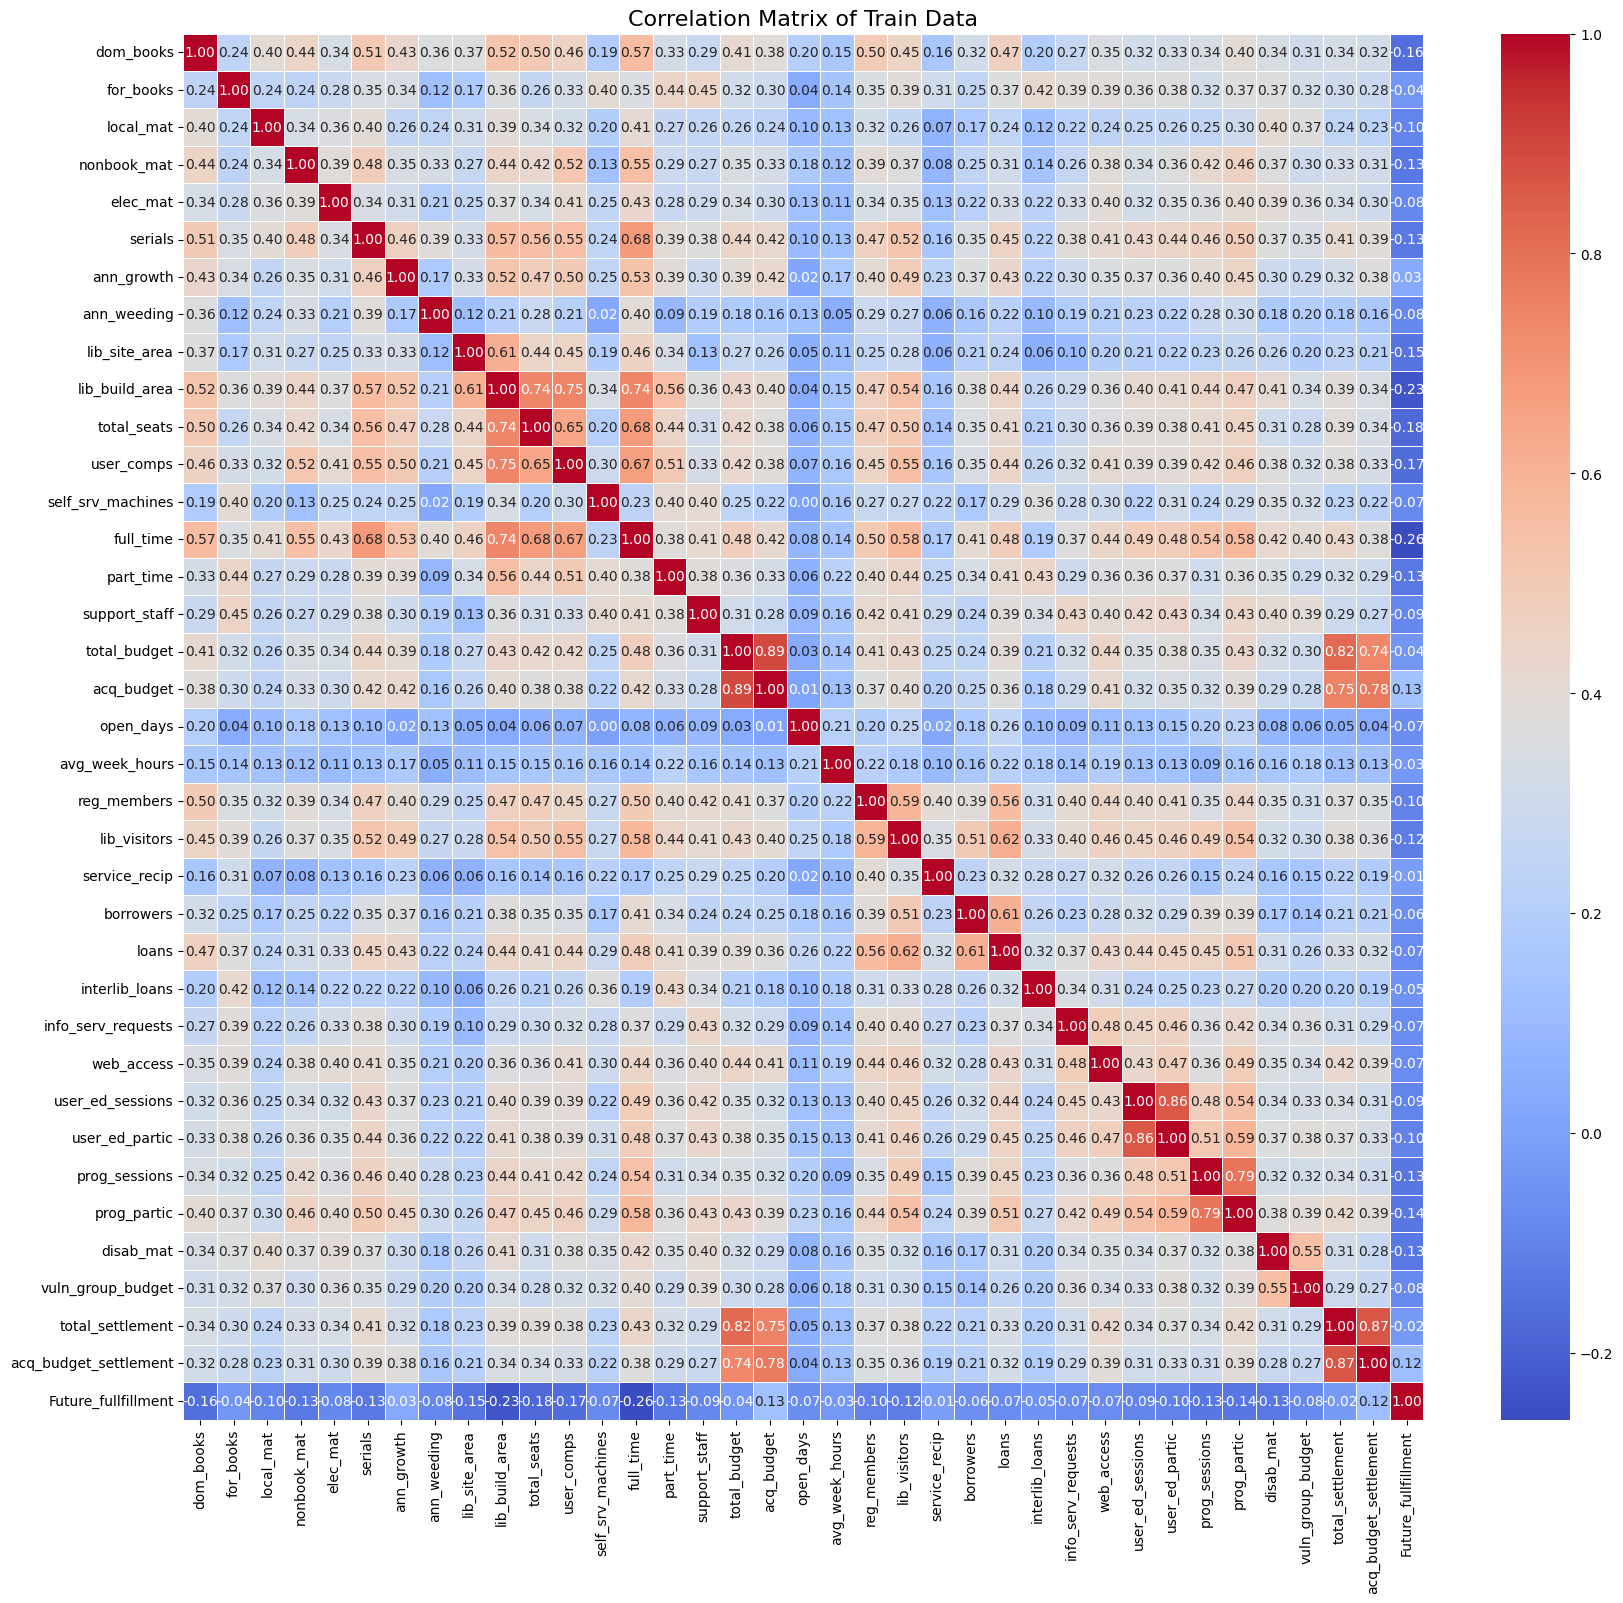

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 훈련 데이터의 상관 행렬 계산
corr_matrix = train_lib.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Train Data', fontsize=16)
plt.show()

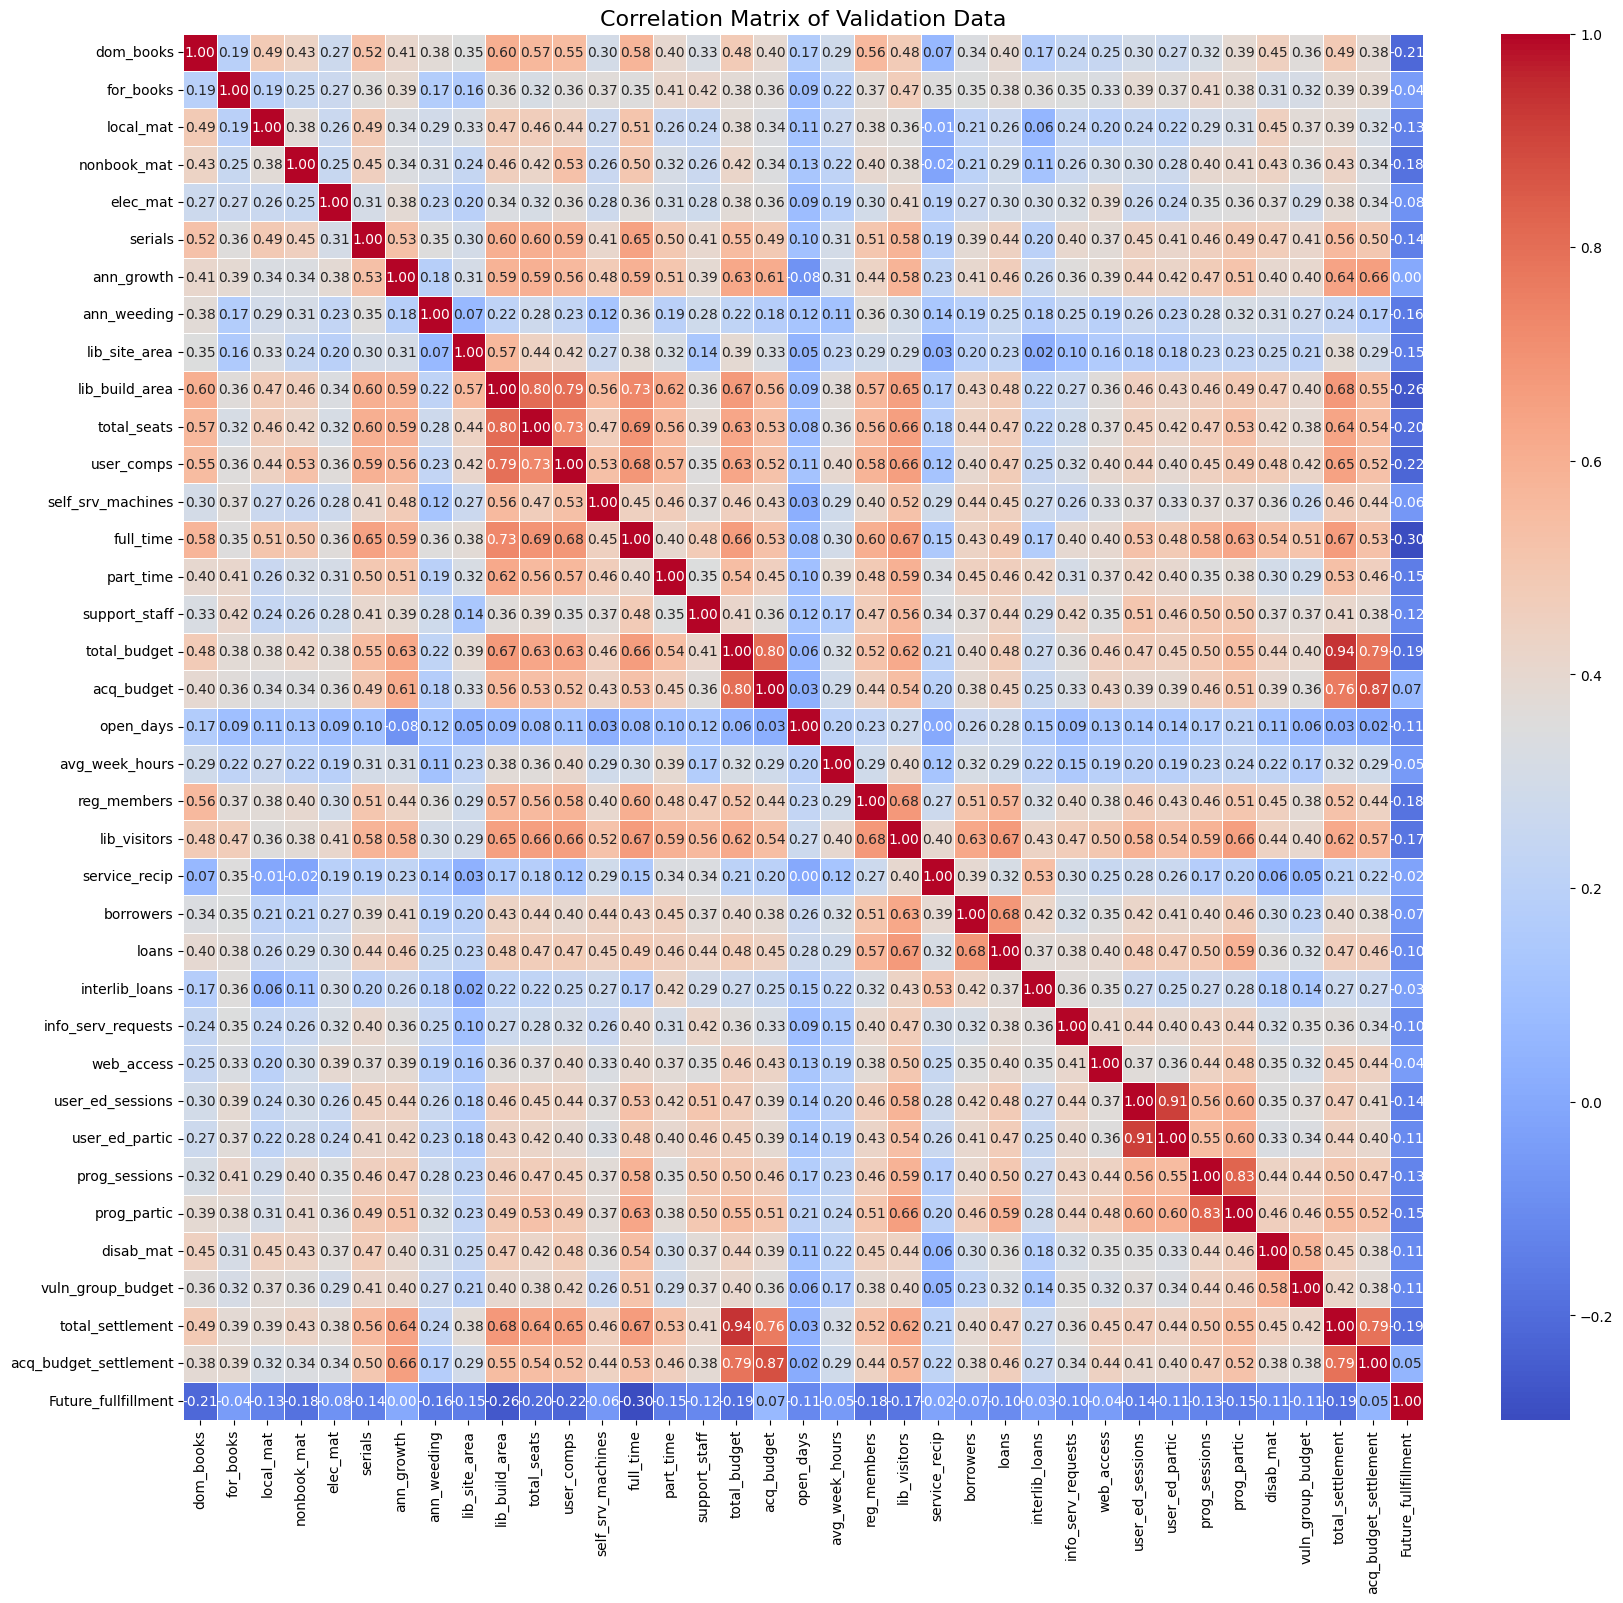

In [7]:
# 훈련 데이터의 상관 행렬 계산
corr_matrix = valid_lib.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Validation Data', fontsize=16)
plt.show()

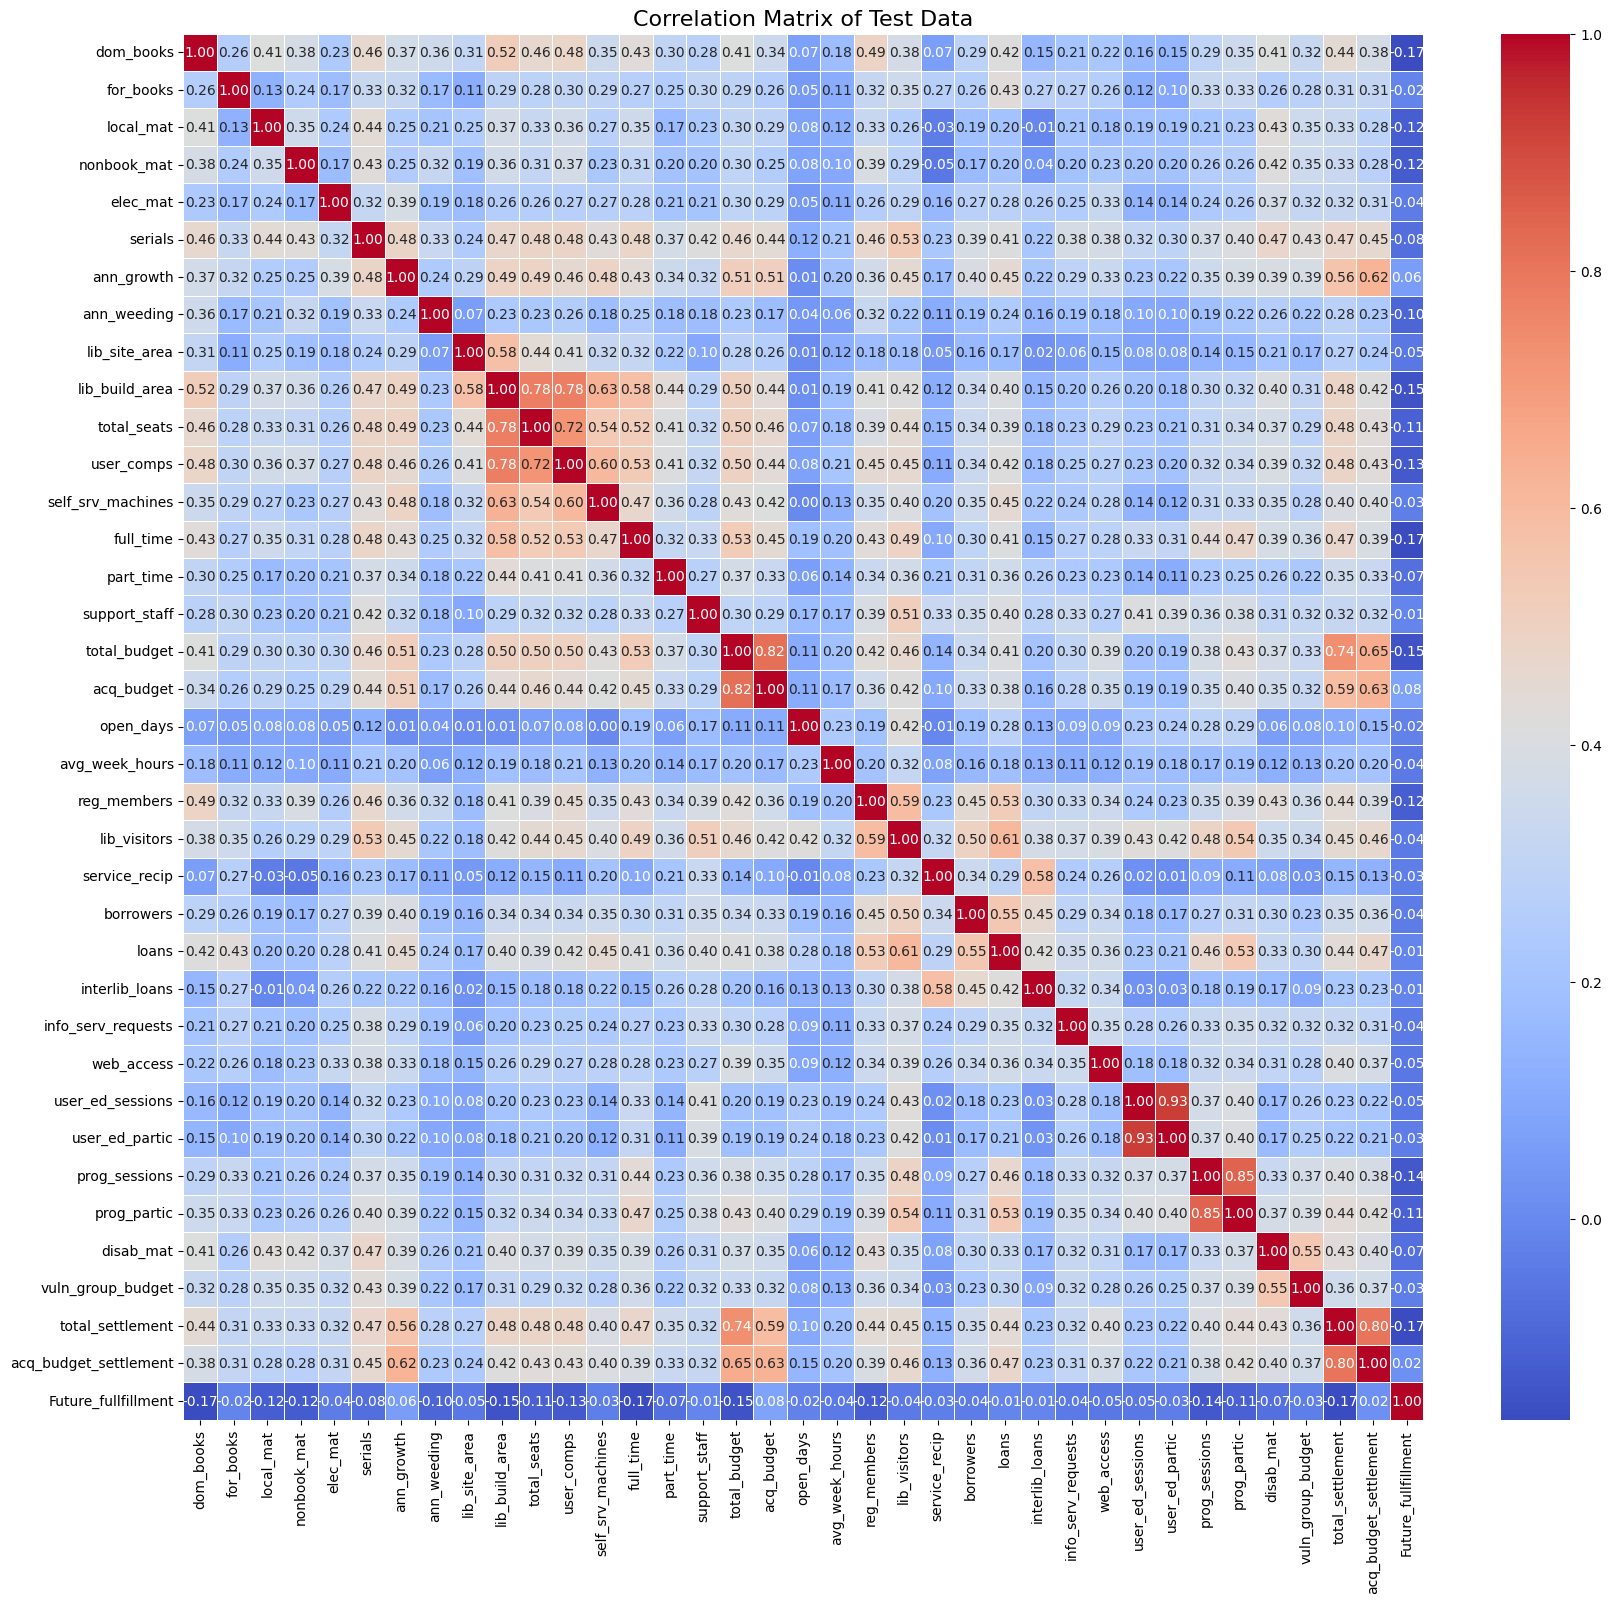

In [8]:
# 훈련 데이터의 상관 행렬 계산
corr_matrix = test_lib.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Test Data', fontsize=16)
plt.show()

/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


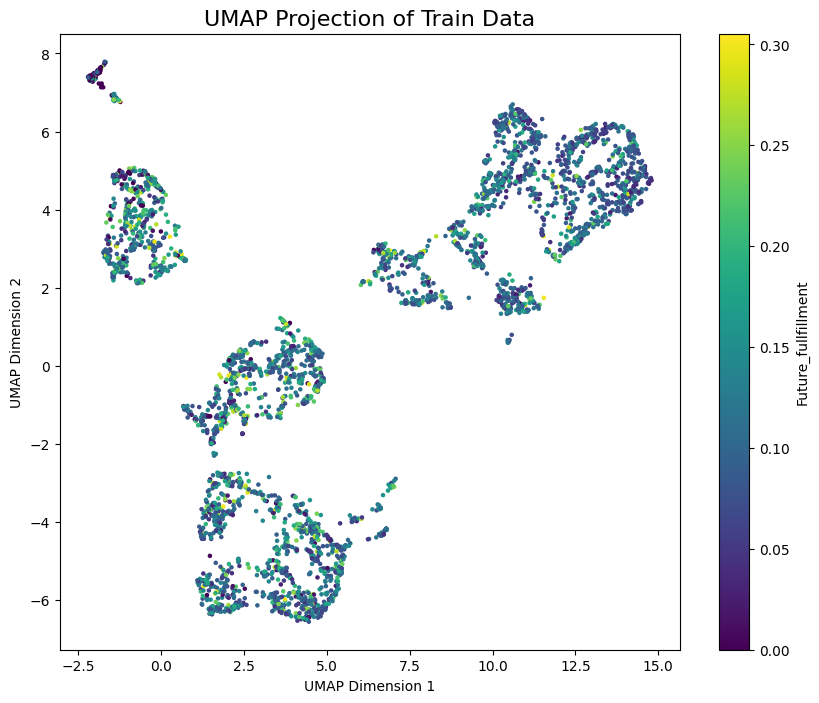

In [10]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# UMAP 모델 생성 및 데이터 피팅
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(train_lib.drop(columns=['Future_fullfillment']))

# UMAP 결과 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=train_lib['Future_fullfillment'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Future_fullfillment')  
plt.title('UMAP Projection of Train Data', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()




/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


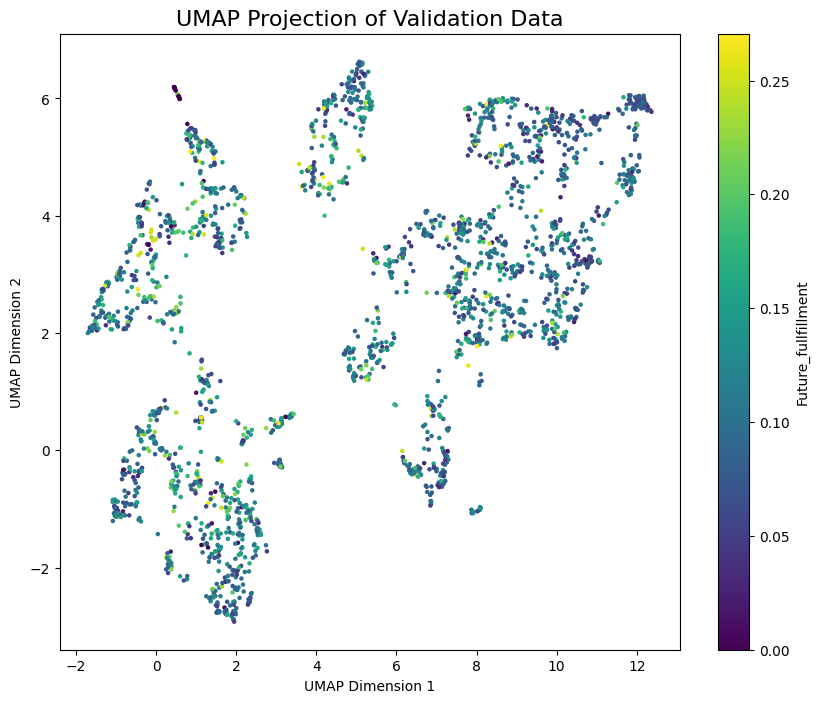

In [11]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# UMAP 모델 생성 및 데이터 피팅
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(valid_lib.drop(columns=['Future_fullfillment']))

# UMAP 결과 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=valid_lib['Future_fullfillment'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Future_fullfillment')  
plt.title('UMAP Projection of Validation Data', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()




/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


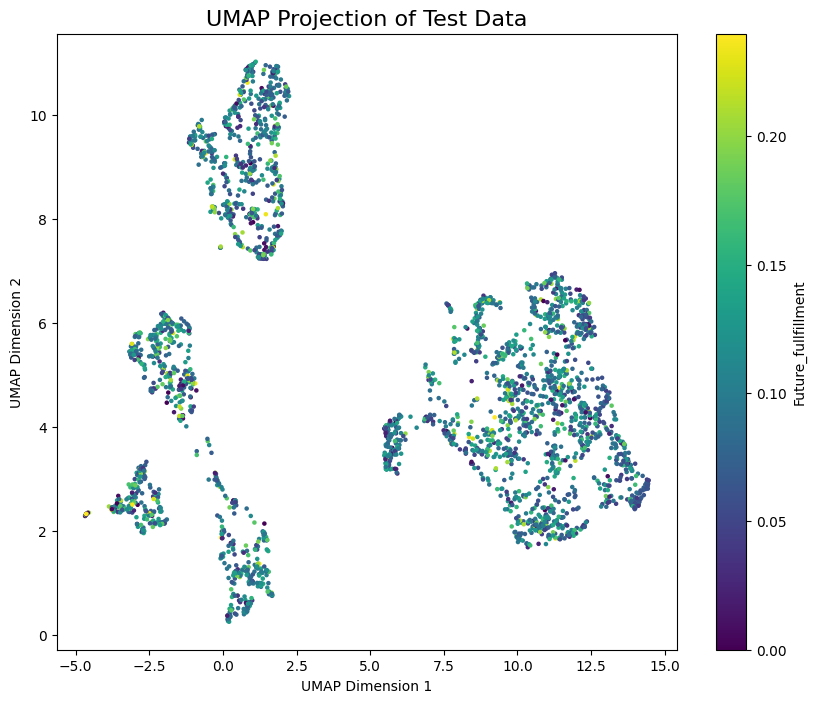

In [12]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# UMAP 모델 생성 및 데이터 피팅
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(test_lib.drop(columns=['Future_fullfillment']))

# UMAP 결과 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=test_lib['Future_fullfillment'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Future_fullfillment')  
plt.title('UMAP Projection of Test Data', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


